In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
# DOWNLOAD TESLA DATA
df = yf.download("TSLA", start="2015-01-01", end="2025-01-01")
df.columns = ["Close", "High", "Low", "Open", "Volume"]

# SHOW FIRST 5 ROWS
df.head()

C:\Users\hp5cd\AppData\Local\Temp\ipykernel_11496\1490007552.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [5]:
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Open    2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


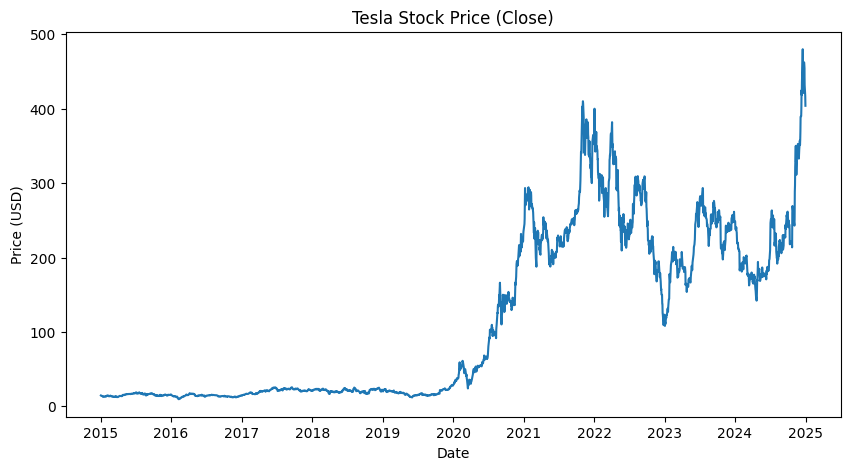

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title("Tesla Stock Price (Close)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [7]:
df['Prev_Close'] = df['Close'].shift(1)
df = df.dropna()  # remove first NaN row


In [8]:
X = df[['Prev_Close']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, predictions)
mse


74.7349318889143

In [1]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("Actual vs Predicted Tesla Prices")
plt.legend()
plt.savefig("tesla_prediction.png", dpi=300)

plt.show()


NameError: name 'plt' is not defined